In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# #Load data from URL
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# data = pd.read_csv(url,
#                    names= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
#                            'race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income_class'])

# # Save data to CSV file
# data.to_csv('adult_data.csv', index=False)


In [3]:
# Read data from CSV file
data = pd.read_csv('adult_data.csv')

In [4]:
# Original Data
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Cleaning

In [5]:
# Check for missing values
data.isnull().sum()   #no missing values itseems

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_class      0
dtype: int64

In [6]:
data['income_class'].value_counts()

 <=50K    24720
 >50K      7841
Name: income_class, dtype: int64

In [7]:
# Create target column using boolean indexing for target
data['target'] = (data['income_class'] == ' >50K').astype(int)

In [8]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [9]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
# Drop rows with '?' values
data = data[data['workclass'] != ' ?']
data = data[data['occupation'] != ' ?']

In [11]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workclass, dtype: int64

In [12]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
#create dataframe of dummy variables
diff = data[['workclass','education','marital-status','occupation','relationship','race']]

# one hot encoding for 'workclass' feature
data_onehot_df = pd.get_dummies(diff, prefix=['workclass','education','marital-status','occupation','relationship','race'])

In [14]:
data_onehot_df.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [15]:
# dropping unnecessary columns
data.drop(['fnlwgt', "education-num"],axis=1, inplace=True)

In [16]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [17]:
data['native-country'].value_counts
data['native-country'] = data['native-country'].astype(str)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [18]:
# If American = 1, individual is from USA. Else, it is 0.
data["American"] = np.where(data["native-country"] == " United-States", 1,0)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target,American
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,1
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,1
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,1


In [19]:
# combine dummy variables with original data frame
data_concat = pd.concat([data, data_onehot_df], axis=1)
data_concat

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,1,0,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,...,0,0,1,0,0,0,0,0,0,1


In [20]:
# Drop variables that were one hot encoded
data_concat.drop(['workclass', "education", "marital-status", "relationship", "occupation", "race", "sex", "native-country", "income_class"],axis=1, inplace=True)
data_concat = data_concat.reset_index(drop = True)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
# standardizing the quantatative variables. Sets their mean equal to 0, stddev = 1

data_concat2 = data_concat.iloc[:, :4]
data_concat_scaled = pd.DataFrame(scaler.fit_transform(data_concat2))
data_concat_scaled.rename(columns={0: "age", 1: "capital-gain", 2 : "capital-loss", 3 : "hours-per-week"}, inplace = True)
data_concat_scaled.reset_index(drop = True)
data_concat_scaled

data_concat["age"] = data_concat_scaled["age"]
data_concat["capital-gain"] = data_concat_scaled["capital-gain"]
data_concat["capital-loss"] = data_concat_scaled["capital-loss"]
data_concat["hours-per-week"] = data_concat_scaled["hours-per-week"]
data_concat

,age,capital-gain,capital-loss,hours-per-week,target,American,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.042416,0.142438,-0.219179,-0.079207,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.880958,-0.147516,-0.219179,-2.331988,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.033815,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1.109651,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.796125,-0.147516,-0.219179,-0.079207,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,-0.872356,-0.147516,-0.219179,-0.246080,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
30714,0.118647,-0.147516,-0.219179,-0.079207,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
30715,1.490806,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
30716,-1.253512,-0.147516,-0.219179,-1.747934,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


# y_pre = data_concat.drop(['target'],axis=1)
# X = np.array(y_pre)
# Y = np.array(data_concat.target)

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=48824)

# clf = RandomForestClassifier(n_estimators=100)
# clf.fit(X_train,Y_train)
# y_pred = rfCLF.predict(X_test)

# print("ACCURACY OF THE RANDOM FOREST MODEL: ", metrics.accuracy_score(Y_test, y_pred))

ACCURACY OF THE RANDOM FOREST MODEL:  0.840854526958291


In [36]:
features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week',
            'American', 'workclass_ Federal-gov', 'workclass_ Local-gov',
            'workclass_ Private', 'workclass_ Self-emp-inc',
            'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
            'workclass_ Without-pay', 'education_ 10th', 'education_ 11th',
            'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
            'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
            'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
            'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
            'education_ Prof-school', 'education_ Some-college',
            'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
            'marital-status_ Married-civ-spouse',
            'marital-status_ Married-spouse-absent',
            'marital-status_ Never-married', 'marital-status_ Separated',
            'marital-status_ Widowed', 'occupation_ Adm-clerical',
            'occupation_ Armed-Forces', 'occupation_ Craft-repair',
            'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
            'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
            'occupation_ Other-service', 'occupation_ Priv-house-serv',
            'occupation_ Prof-specialty', 'occupation_ Protective-serv',
            'occupation_ Sales', 'occupation_ Tech-support',
            'occupation_ Transport-moving', 'relationship_ Husband',
            'relationship_ Not-in-family', 'relationship_ Other-relative',
            'relationship_ Own-child', 'relationship_ Unmarried',
            'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
            'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other',
            'race_ White']
            
target = 'target'

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data_concat[features], 
                                                    data_concat[target], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [38]:
X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, 
                                                  test_size=0.5, 
                                                  random_state=42)

In [44]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8411458333333334


In [46]:
y_pred_eval = clf.predict(X_eval)
accuracy_eval = metrics.accuracy_score(y_eval, y_pred_eval)
print(f"Evaluation accuracy: {accuracy_eval}")

Evaluation accuracy: 0.837890625


In [52]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = X_train.columns

# Create a sorted list of (importance, feature) tuples
feature_importances = sorted(zip(importances, feature_names), reverse=True)

# Print the feature importance scores
for importance, feature_name in feature_importances:
    print(f"{feature_name}: {importance}")

age: 0.23247083512967692
hours-per-week: 0.11410726168687431
capital-gain: 0.1119386355132017
marital-status_ Married-civ-spouse: 0.0862602309589485
relationship_ Husband: 0.046039275299086635
capital-loss: 0.037447154958287376
marital-status_ Never-married: 0.026550449866347102
occupation_ Prof-specialty: 0.023199386947769417
occupation_ Exec-managerial: 0.022322127318773904
education_ Bachelors: 0.021919857998078843
education_ HS-grad: 0.014130254943555479
education_ Masters: 0.01394534037333539
American: 0.012433153150350085
workclass_ Private: 0.012184259534654929
relationship_ Not-in-family: 0.011042842473123744
workclass_ Self-emp-not-inc: 0.010666393771271763
education_ Some-college: 0.010505627475813102
relationship_ Own-child: 0.009540220260690872
relationship_ Wife: 0.009256915518260592
occupation_ Other-service: 0.008902833397395697
occupation_ Sales: 0.008252211327679587
occupation_ Craft-repair: 0.008188117161813911
race_ White: 0.008181470000596772
relationship_ Unmarried

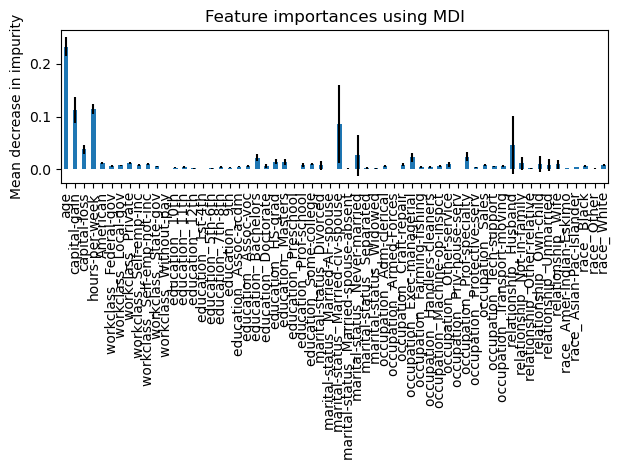

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()